# Project Team – Structured Scale-Free Networks

**Members:**  
- Victor Alexander Capa Sandoval  
- Diego Ismael Garcia Tripiana  
- Iker Lomas Javaloyes  
- Christian Solis Calero  

**Contact Email:** ikerlomas@ifisc.uib-csic.es  

**Course:** Complex Networks  
**Group Assignment:** Structured Scale-Free Networks  

**Tasks to Complete (per instructions):**  
- Generate networks using the Structured Scale-Free Network model at various sizes.  
- Compute the degree distribution and verify its theoretical match.  
- Evaluate the clustering coefficient and compare it to theory.  
- Determine the network dimension.  
- Visualize the networks across different parameter values; bonus: create an animation of network assembly.  

---

All code modules are organized in the `src/` folder, where each file defines functions for generation, analysis, and visualization. Example data and results are stored in the `data/` folder.  

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import imageio
import h5py
from multiprocessing import Pool, cpu_count

from IPython.display import Video

import os
import sys

# 1. Obtiene la ruta absoluta del directorio donde está el notebook
current_dir = os.getcwd()

# 2. Obtiene la ruta del directorio padre (la raíz del proyecto)
project_root = os.path.dirname(current_dir)

# 3. Añade la raíz al sys.path si no está ya
if project_root not in sys.path:
    sys.path.append(project_root)

We import the library that contains all the necessary functions for generating and analyzing structured scale-free networks.

In [2]:
import src

For the plots we use LaTeX with Times New Roman font for better aesthetics.

In [3]:
# Configuración global para usar LaTeX en todas las gráficas con Times New Roman
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['font.serif'] = ['Times New Roman']  # Especifica Times New Roman
plt.rc('font', size=14)  # Ajusta el tamaño de la fuente según prefieras 18
plt.rcParams['grid.linestyle'] = '--'  # Estilo de línea del grid
plt.rcParams['grid.linewidth'] = 0.4   # Ancho de línea del grid
plt.rcParams['grid.alpha'] = 0.6       # Transparencia del grid
plt.rcParams['axes.grid'] = True       # Activa el grid de manera predeterminada en todos los ejes

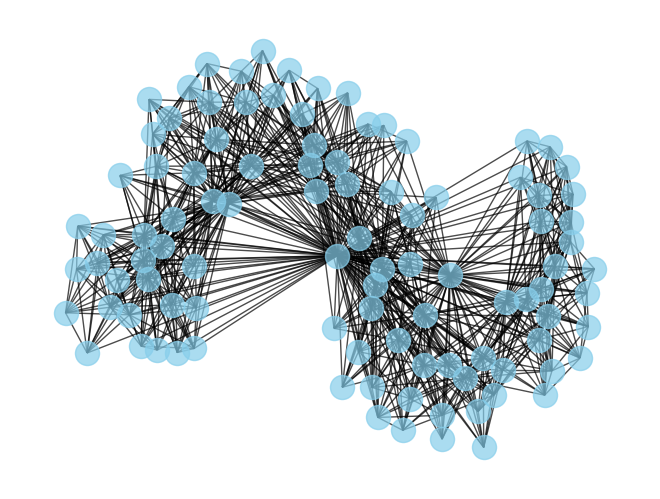

In [4]:
Graph = src.hc_scale_free_graph(100, m=10, a=10, directed=False, seed=None)
nx.draw(Graph, node_color='skyblue', alpha=0.7)

Script to generate a video for the structure scale-free networks growth process.

**Warning: This process may take a while depending on your machine's capabilities and temporarily needs disk space.**

In [5]:
!python ../src/video_maker.py

/home/ikerbenidorm/Documentos/GitHub/structured-scale-free-networks/src
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (7678, 3270) to (7680, 3280) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [ ]:
Video("../data/network_comparison.mp4",
      width=1200,
      height=600,
      embed=True,  # Embed in the notebook
      html_attributes="controls autoplay loop")

In [7]:
dist_norm, degree_count, graph_dict, G = src.calculate_degree_distribution_Graph(Graph)

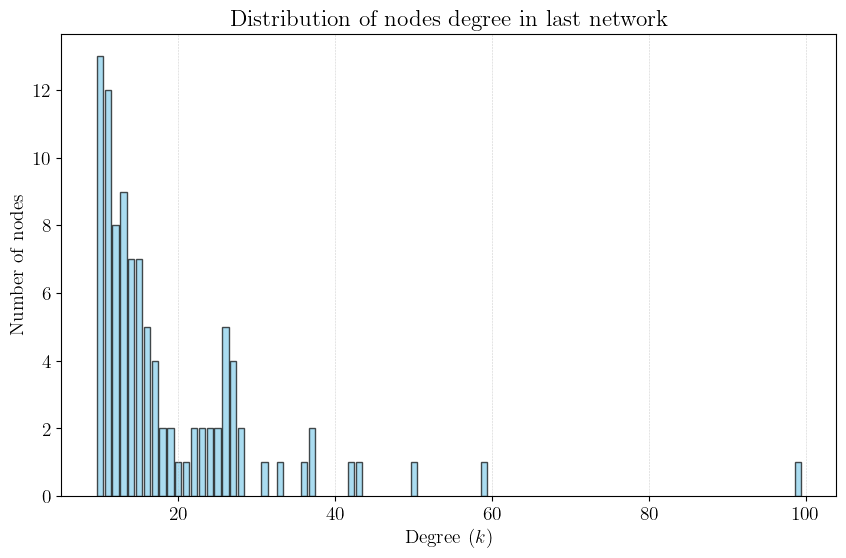

In [8]:
degrees = list(degree_count.keys())
frequencies = list(degree_count.values())

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(degrees, frequencies, color='skyblue', alpha=0.7, edgecolor='black')

# Customize the chart
plt.title("Distribution of nodes degree in last network")
plt.xlabel('Degree ($k$)')
plt.ylabel('Number of nodes')
plt.grid(axis='y')

In [9]:
file_path = os.path.join(project_root, 'data', 'clustering_coefficients.h5')

if os.path.exists(file_path):
    # Use the saved data
    with h5py.File(file_path, 'r') as f:
        ccl1_list = f['ccl1_list'][:]
        ccl2_list = f['ccl2_list'][:]
        # optional: load nods if it exists in the file
        if 'nods' in f:
            nods = f['nods'][:].astype(int).tolist()
    print(f"Data loaded from {file_path}")
else:
    # Calculate and save the data
    ccl1_list = np.array([])
    ccl2_list = np.array([])

    def process_single_node(args):
        """Porcess unique value of nodes"""
        i, l = args
        Graph1 = src.hc_scale_free_graph(l, m=10, a=10, directed=False, seed=43254)
        Graph2 = src.hc_scale_free_graph(l, m=2, a=2, directed=False, seed=70982)

        ccl1 = src.efficient_clustering_coefficient(Graph1.edges())[-1].item()
        ccl2 = src.efficient_clustering_coefficient(Graph2.edges())[-1].item()

        return ccl1, ccl2

    nods = list(map(int, np.logspace(1, 4, num=1000)))
    num_cores = max(1, cpu_count())

    with Pool(processes=num_cores) as pool:
        results = pool.map(process_single_node, enumerate(nods))

    for ccl1, ccl2 in results:
        ccl1_list = np.append(ccl1_list, ccl1)
        ccl2_list = np.append(ccl2_list, ccl2)

    # Ensure the data directory exists
    os.makedirs(os.path.join(project_root, 'data'), exist_ok=True)

    # Save to HDF5
    with h5py.File(file_path, 'w') as f:
        f.create_dataset('ccl1_list', data=ccl1_list)
        f.create_dataset('ccl2_list', data=ccl2_list)
        f.create_dataset('nods', data=np.array(nods, dtype=int))
    print(f"Data calculated and saved to {file_path}")


Data calculated and saved to /home/ikerbenidorm/Documentos/GitHub/structured-scale-free-networks/data/clustering_coefficients.h5


Text(0, 0.5, 'Probability density')

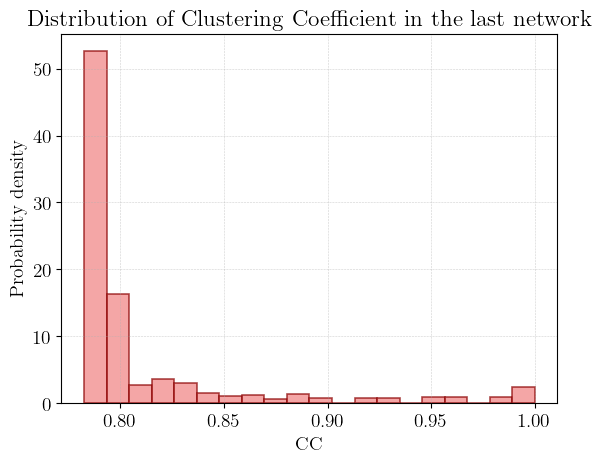

In [15]:
n, bins, patches = plt.hist(ccl1_list, bins=20, alpha=0.7, color='lightcoral', edgecolor='darkred', linewidth=1.2, density=True)
plt.title('Distribution of Clustering Coefficient in the last network')
plt.xlabel('CC')
plt.ylabel('Probability density')